# Mapillary demo

<span style="color:red;">Note:</span> Please ensure that you have set up the `MAPILLARY_TOKEN` environment variable (cf. README.md).

In [1]:
# --------------------------------------
import warnings

warnings.filterwarnings("ignore")

# --------------------------------------
from PIL import Image

# --------------------------------------
import numpy as np

# --------------------------------------
from matplotlib import pyplot as plt

# --------------------------------------
import mapillary.interface as mly

# --------------------------------------
from streetscapes import conf
import streetscapes.types as sst
import streetscapes.functions as ssf

# Setup

In [2]:
# Image resolution (only used for Mapillary)
resolution = 2048  # Or 1024

# Coordinates
lat = 52.0
lon = 5.25

# Destination directory
directory = ssf.mkdir(conf.OUTPUT_DIR / f"images")

# Source map
source = sst.SourceMap.Mapillary

# Mapillary token setup
mly.set_token(conf.MAPILLARY_TOKEN)

{'token': 'SUCCESS'}

Extract a feature set for a certain longitude and latitude

In [3]:
# Get image points close to in the given coordinates
data = mly.get_image_close_to(longitude=lon, latitude=lat).to_dict()

Show the extracted features

In [4]:
features = data['features']

Check if there are any features in the data for that location and if yes, extract the Image ID for the first feature.

In [5]:
features[0]

{'type': 'Feature',
 'geometry': {'type': 'Point',
  'coordinates': [5.250874757766724, 51.99979092431221]},
 'properties': {'captured_at': 1561196371000,
  'compass_angle': 58.0,
  'creator_id': 100395682205448,
  'id': 265149052021422,
  'is_pano': False,
  'sequence_id': 'fxNYasDryW1oFMysF_3rDA'}}

In [6]:
if len(features) == 0:
    raise KeyError(f"No images found for coordinates {lat}/{lon}")

image_id = features[0]['properties']['id']

Download and display the image

In [7]:
image_path = ssf.download_image(image_id, directory, source, resolution)

Streetscapes | 2024-12-02@11:33:17 | Downloading image 265149052021422.jpeg...


(-0.5, 2047.5, 1535.5, -0.5)

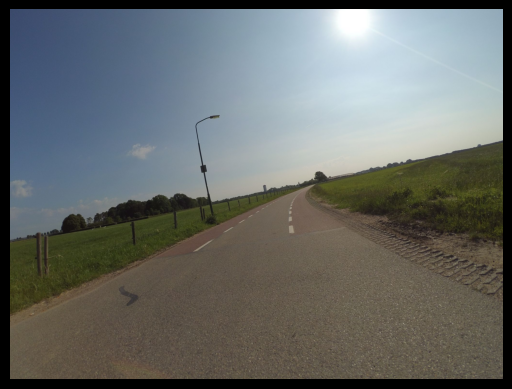

In [8]:
image = np.array(Image.open(image_path))
fig, ax = plt.subplots(1,1)
ax.imshow(image)
ax.axis('off')